# GOAL:HOUSE PRICE PREDICTION

STEPS:
1. EXPLORATORY DATA ANALYSIS FEATURE ENGINEERING
1. FEATURE SELECTION
1. FEATURE SCALING
1. MODEL BUILDING


MODEL SUMMARY:
1. RANDOM FOREST (MAE=MAE: 5363.9,RMSE: 7627.95)
2. XGBOOST (MAE: 11110.25,RMSE: 14983.58)



THESE MODELS PERFORMANCE ARE NOT BAD FOR A TARGET WITH AN AVERAGE OF 177364.34,MINIMUM OF 88000 AND MAXIMUM 0F 326099.99

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

# EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING

In [3]:
#check first 5 rows
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#check botttom 5
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
#check no of columns and rows
train.shape

(1460, 81)

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#get some info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#check for null values
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
#check for unique columns
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#check for cateorical variable types
c_vars = [vr for vr in train.columns if train[vr].dtypes=='O']
c_vars

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [11]:
#check for numerical variables
n_vars = [vr for vr in train.columns if train[vr].dtypes!="O" and vr!='Id']
n_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [12]:
#check for number of variables
print('no of categorical variables:',len(c_vars))
print('no of numerical variables:',len(n_vars))

no of categorical variables: 43
no of numerical variables: 37


In [13]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
#target
target = train.SalePrice

In [15]:
#test id
test_id=test['Id']

In [16]:
#drop salesprice
train = train.drop(['SalePrice'],axis=1)

In [17]:
#drop id
train = train.drop(['Id'],axis=1)

In [18]:
#check unique values of all categorical features
def unique_cat(df,vr):
        return df[vr].unique()

In [19]:
for vr in c_vars:
    print(vr)
    print(unique_cat(train,vr))

MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street
['Pave' 'Grvl']
Alley
[nan 'Grvl' 'Pave']
LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities
['AllPub' 'NoSeWa']
LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope
['Gtl' 'Mod' 'Sev']
Neighborhood
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st
['VinylSd' 'MetalSd'

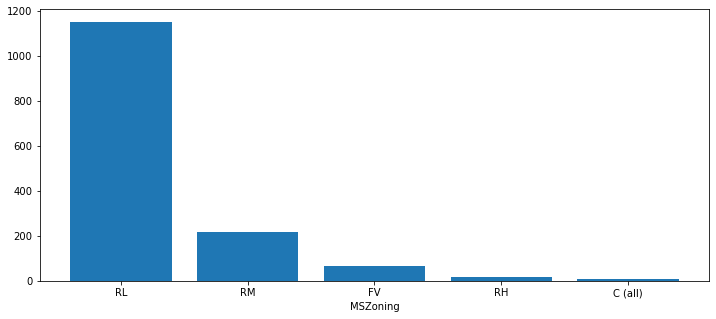

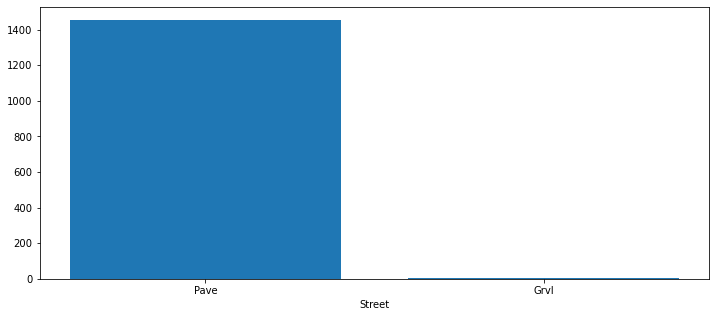

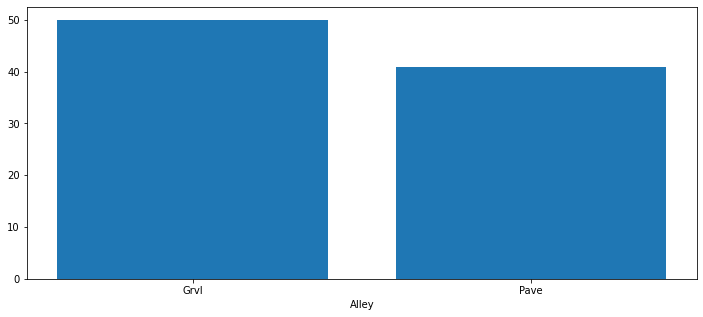

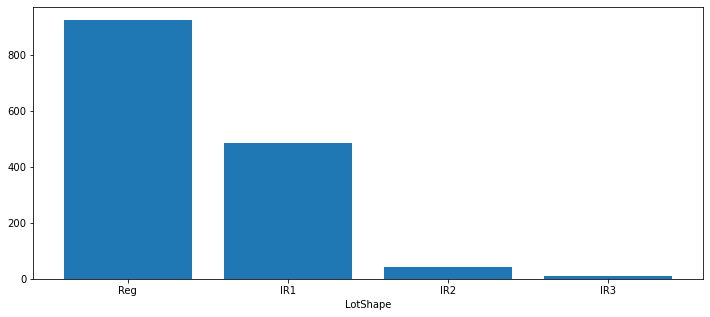

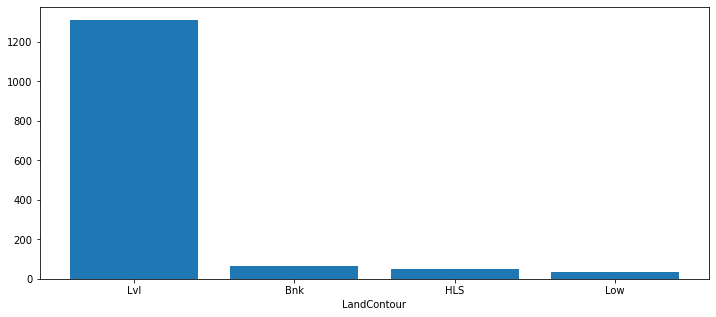

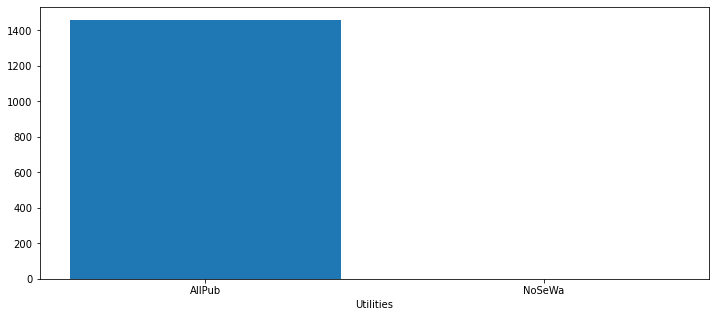

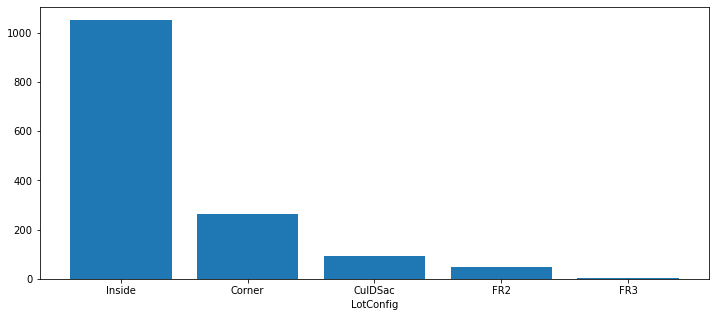

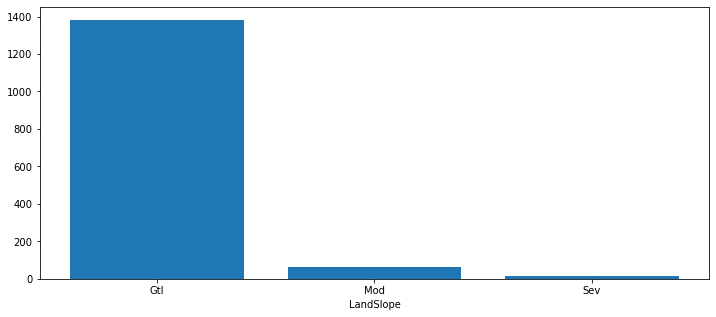

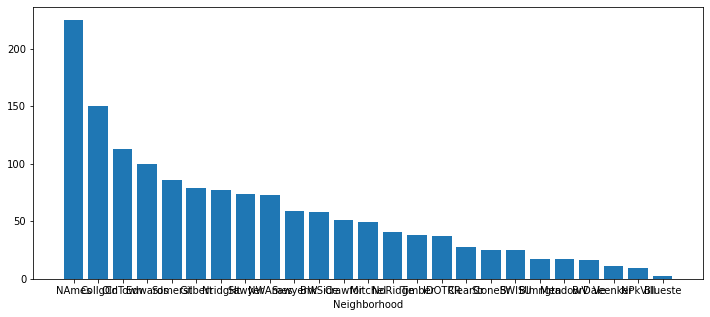

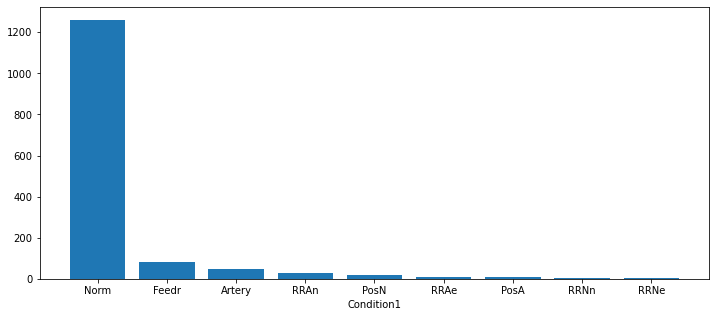

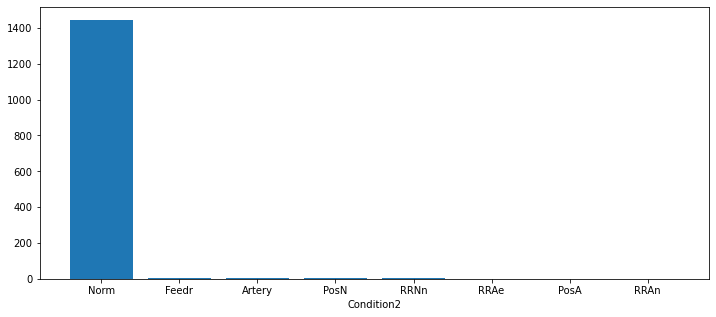

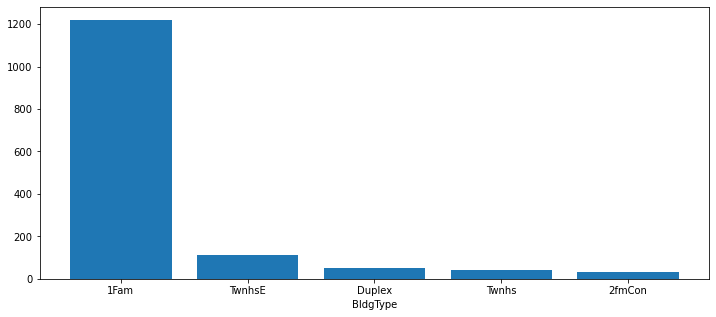

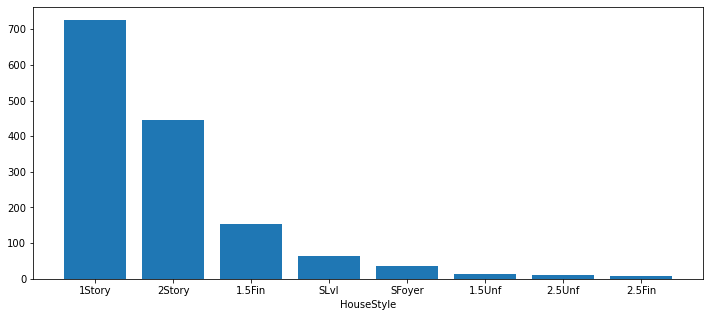

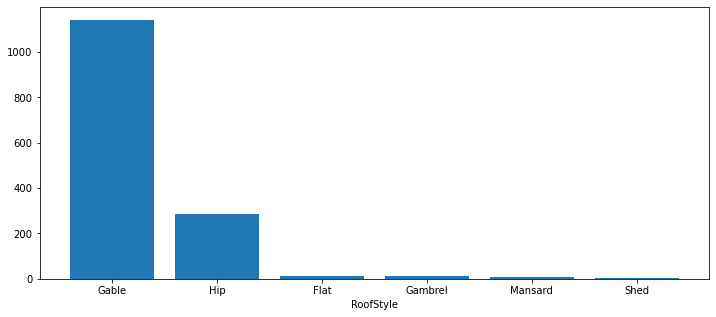

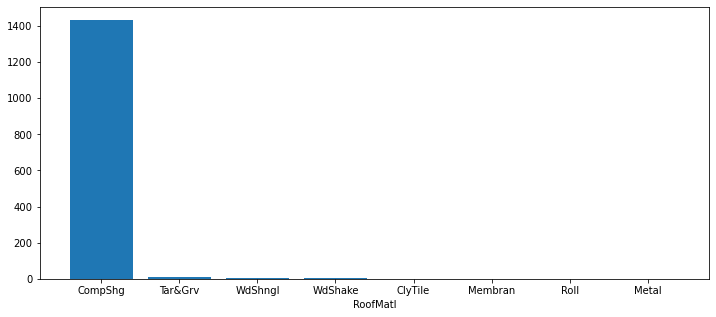

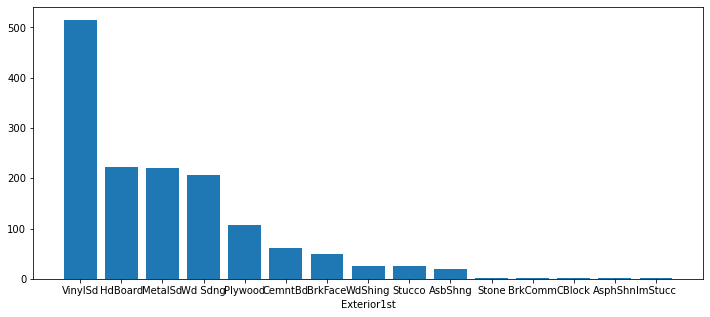

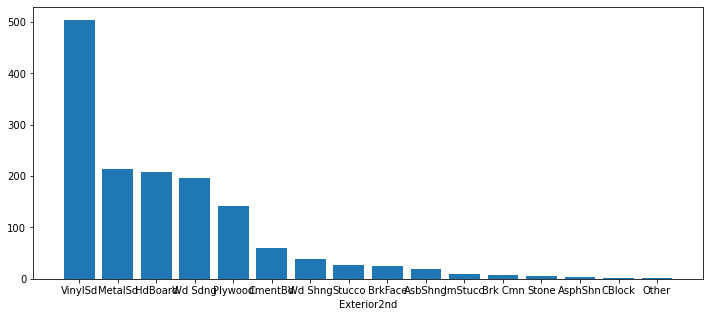

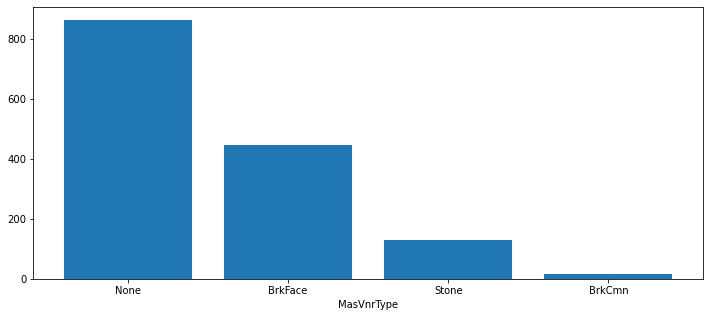

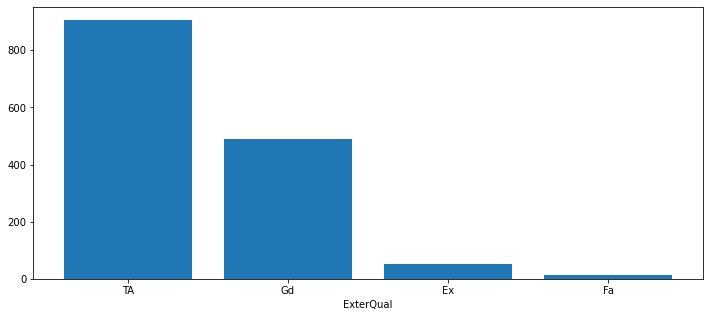

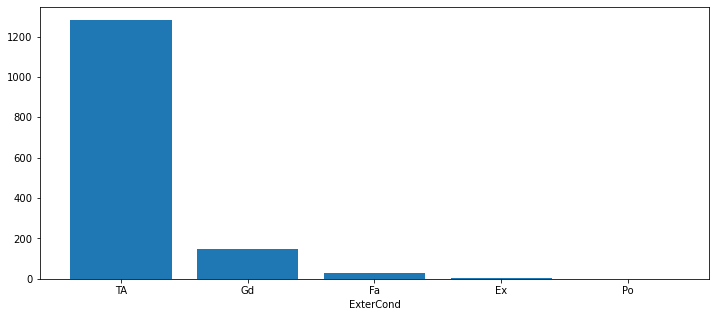

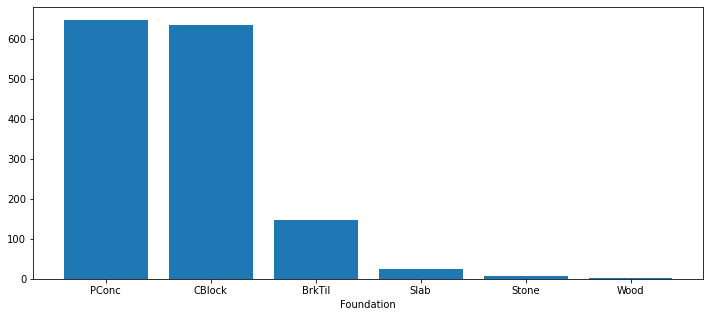

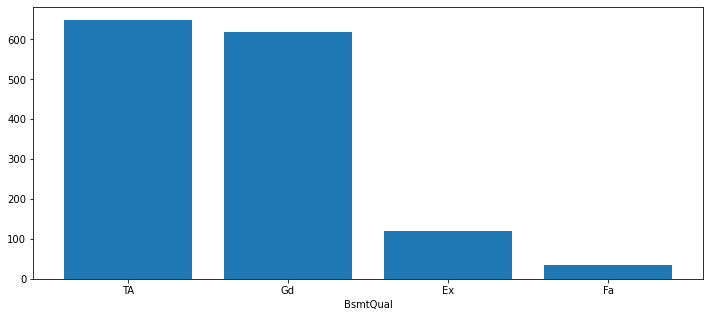

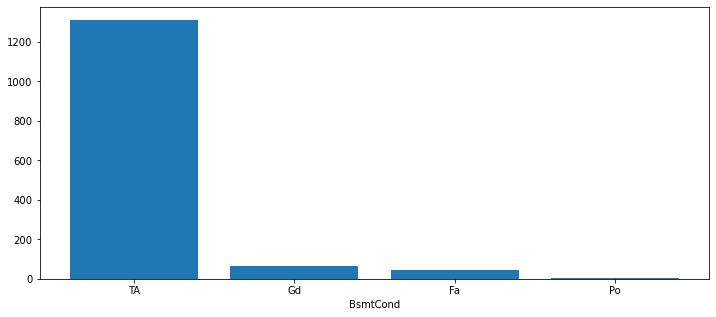

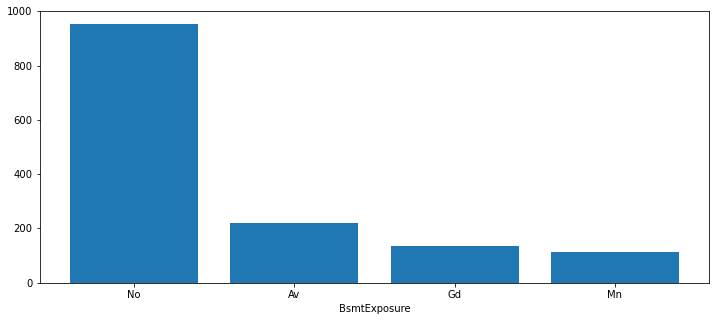

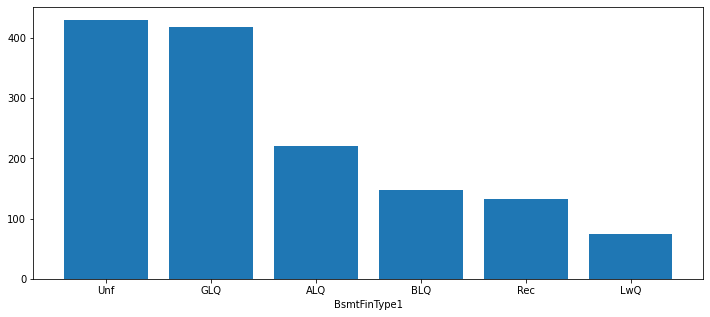

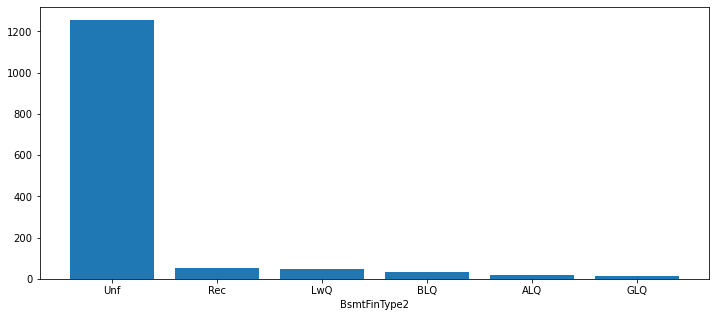

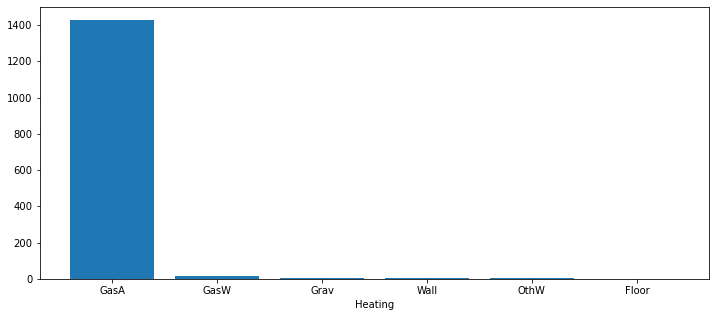

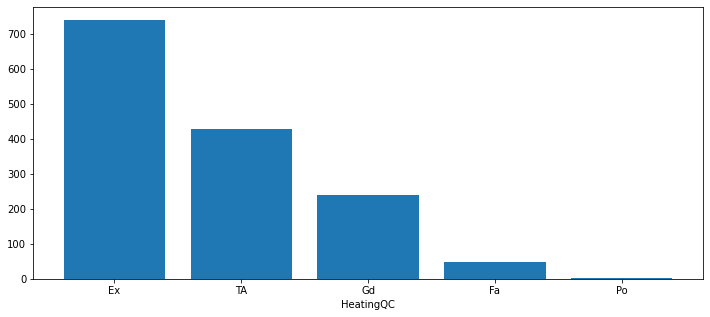

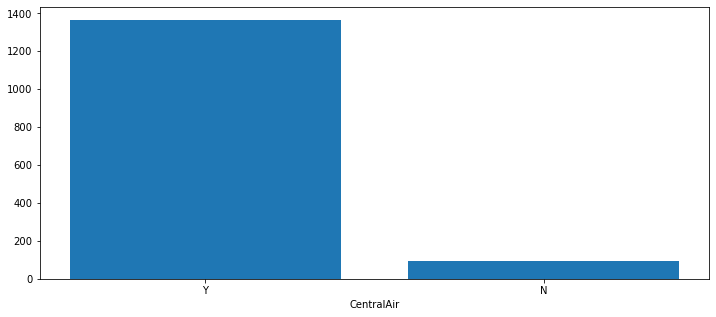

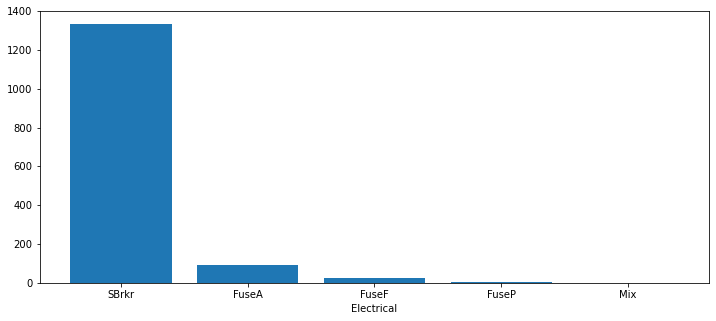

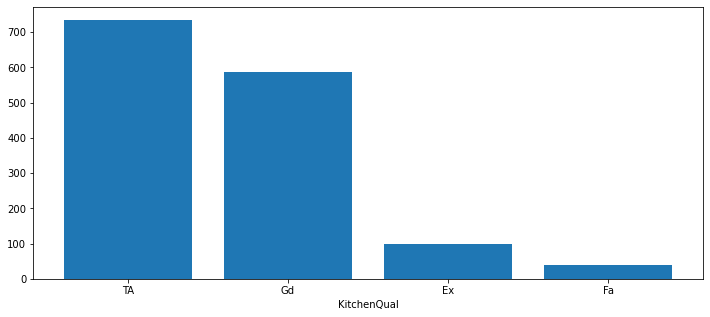

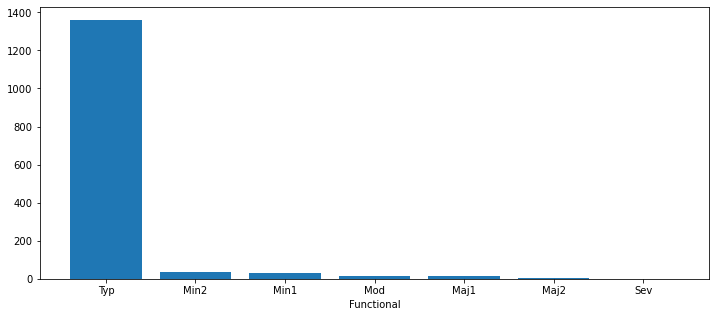

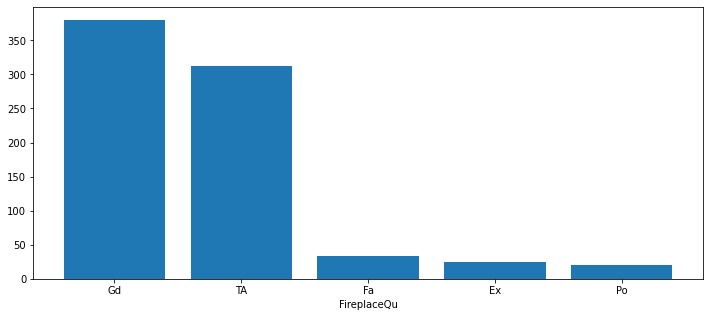

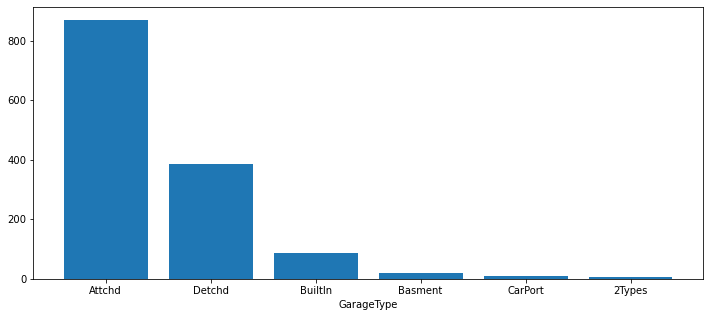

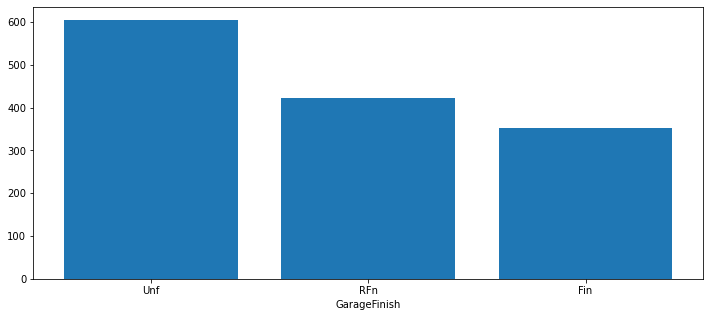

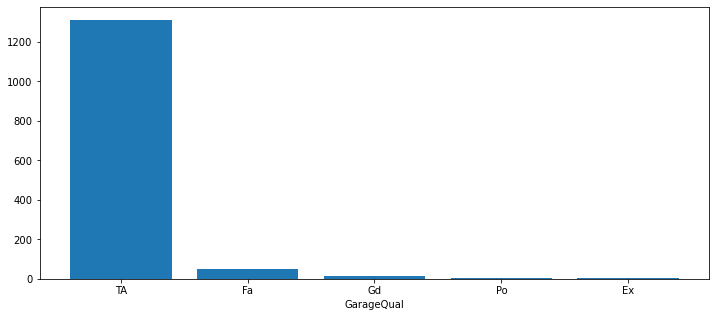

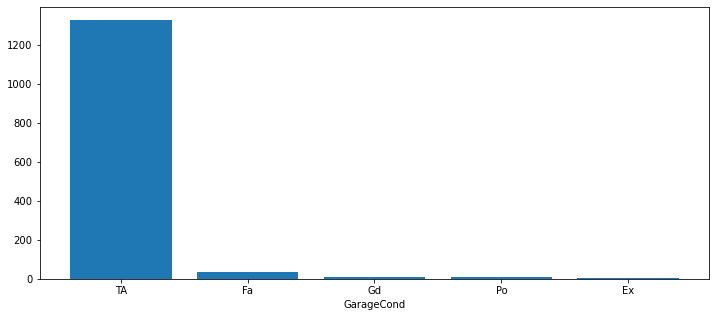

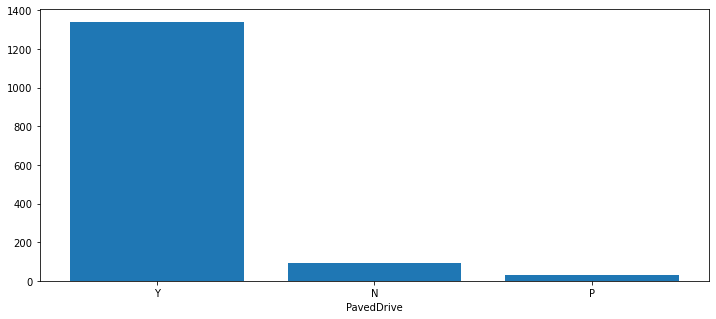

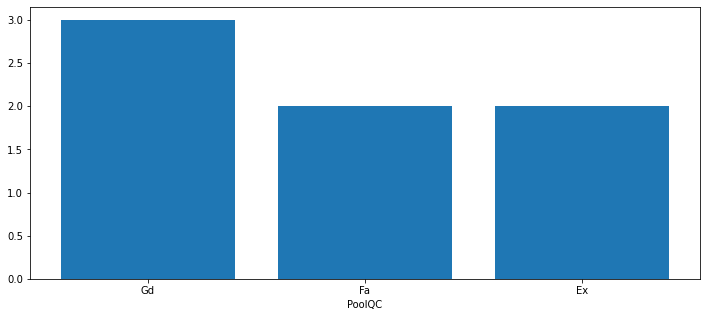

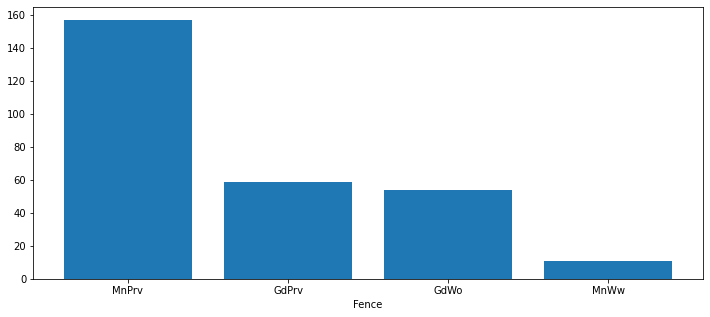

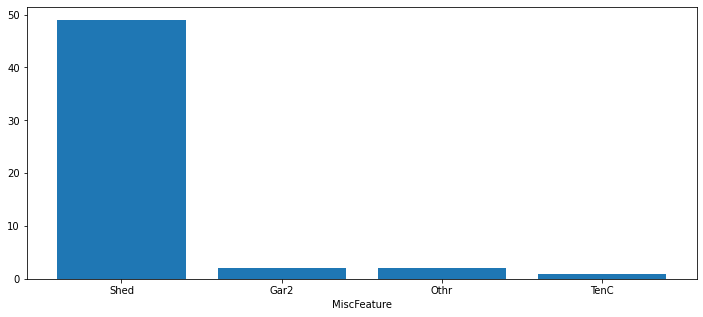

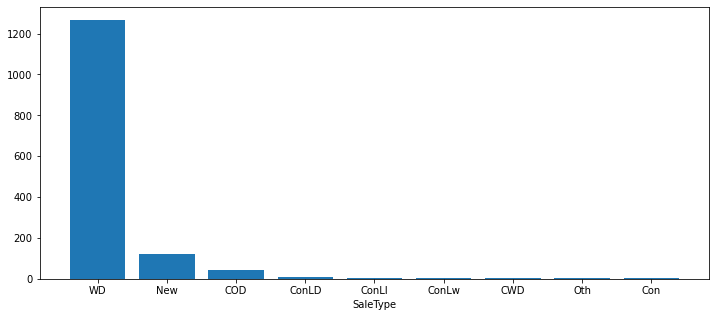

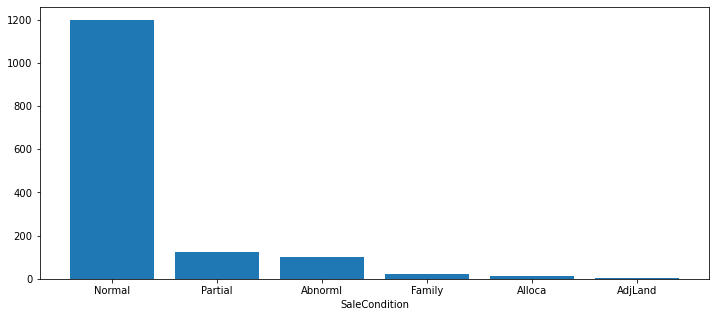

In [20]:
#lets visualise the counts for each categorical features
c_vars = [vr for vr in train.columns if train[vr].dtypes=='O']
for c in c_vars:
    plt.figure(figsize=(12,5))
    plt.bar(train[c].value_counts().index,train[c].value_counts())
    plt.xlabel(c)
    plt.show()
   

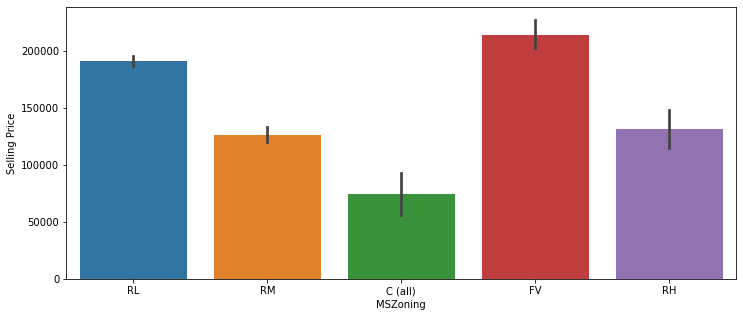

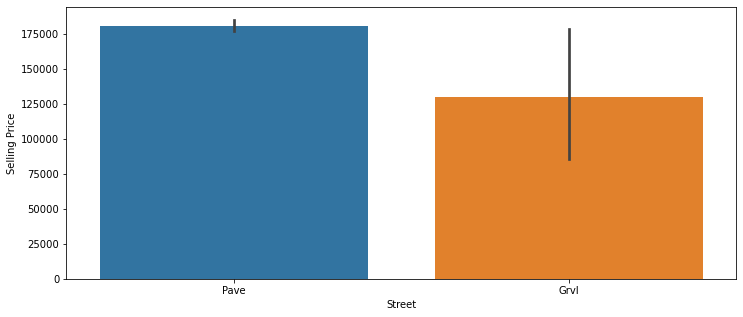

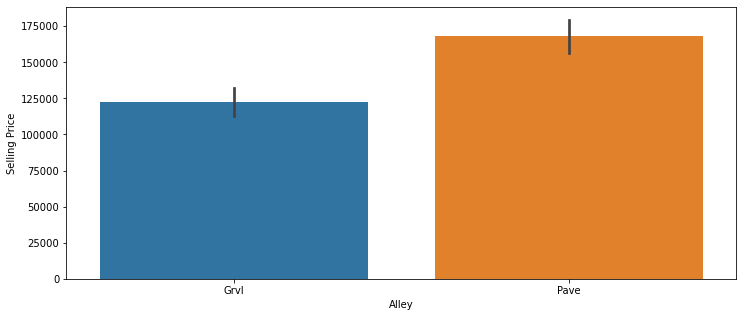

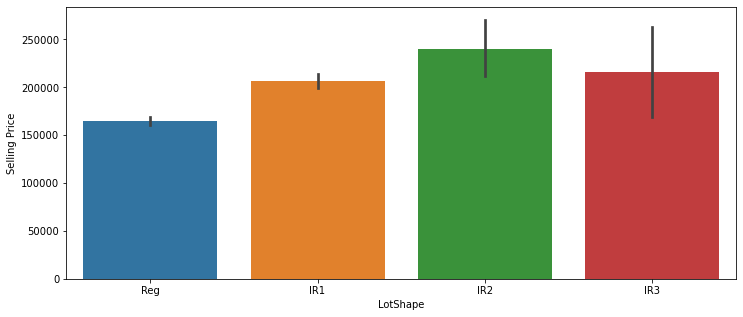

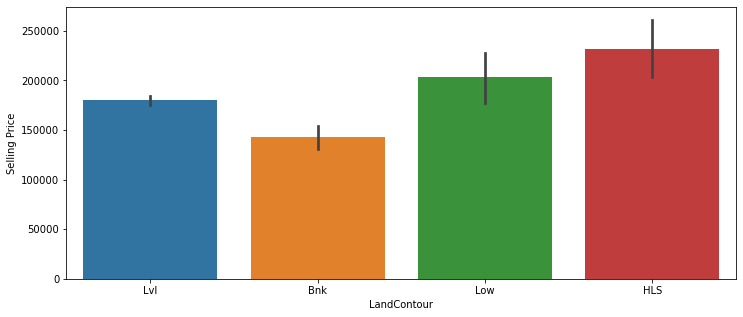

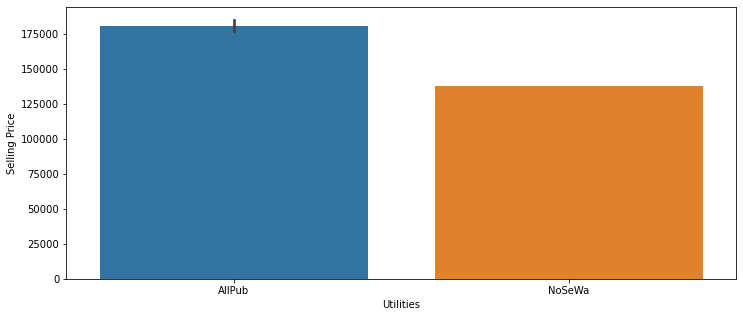

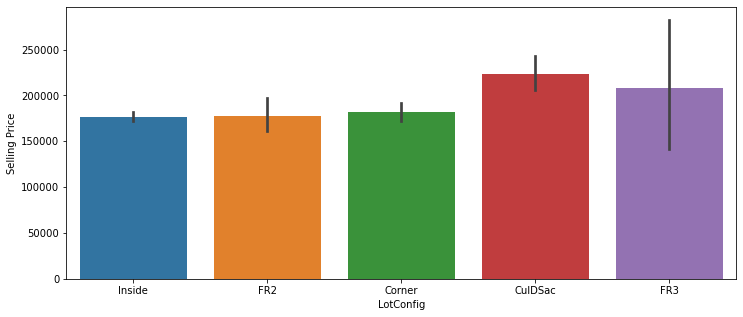

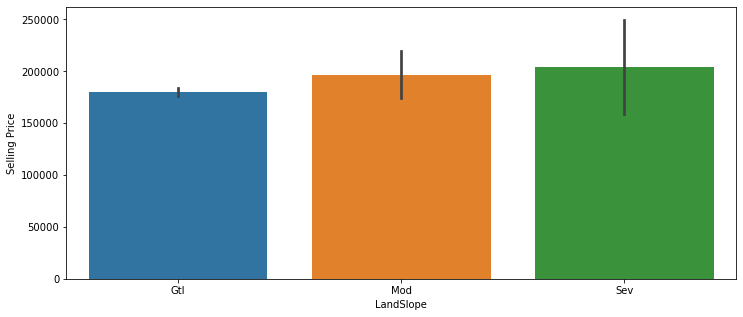

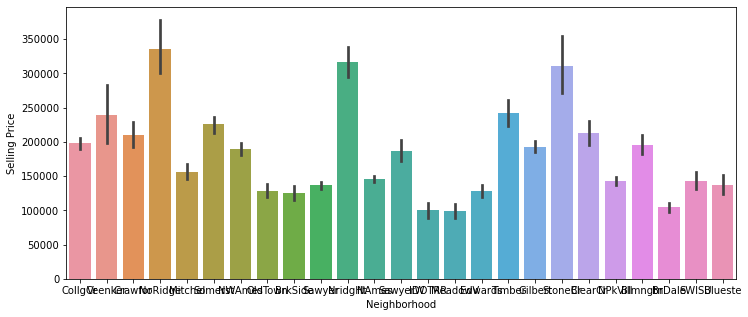

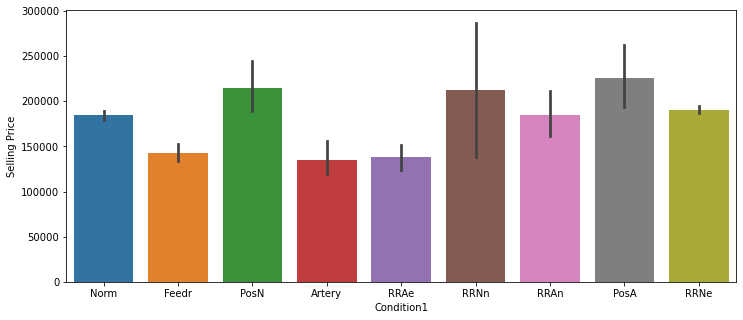

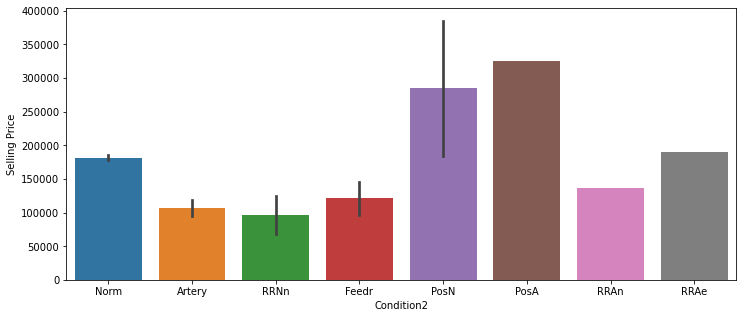

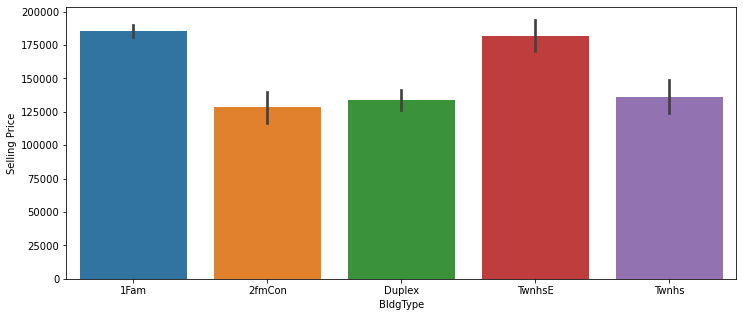

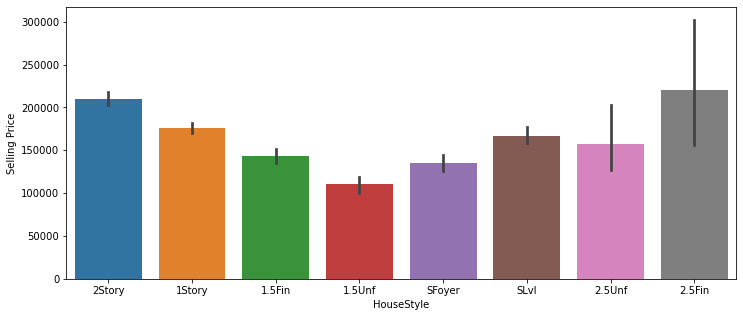

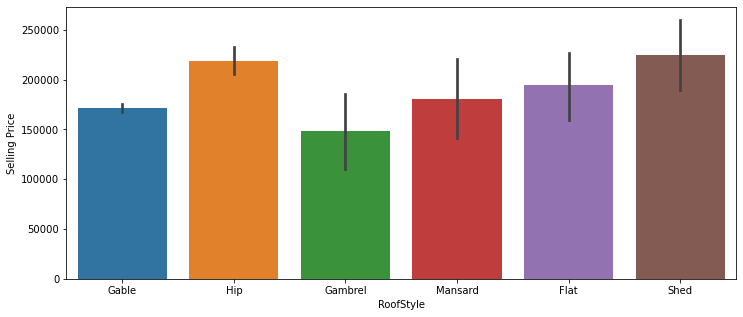

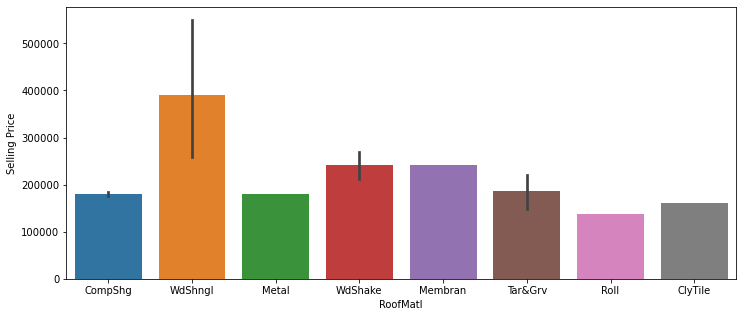

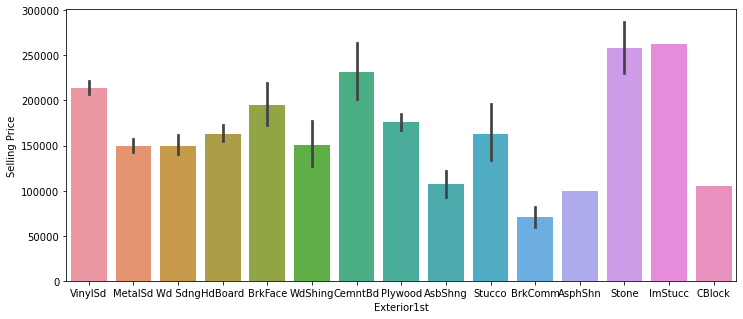

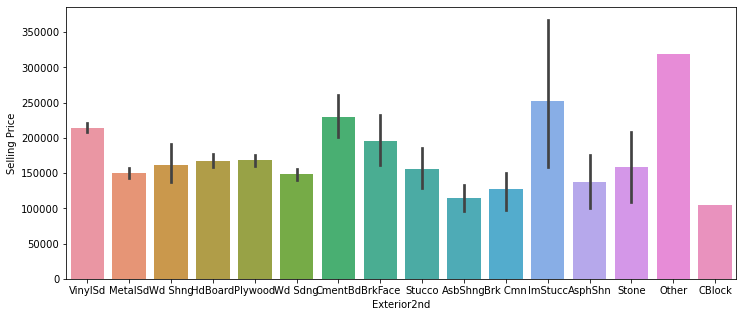

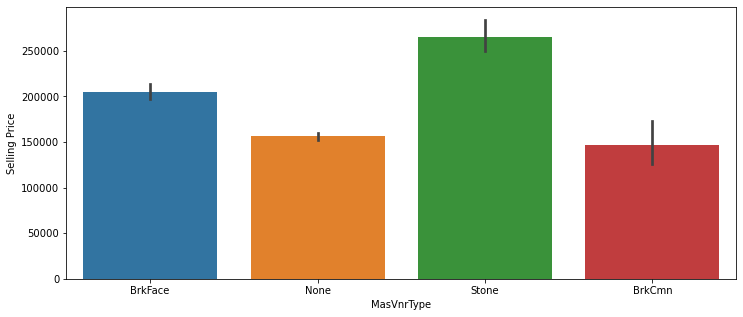

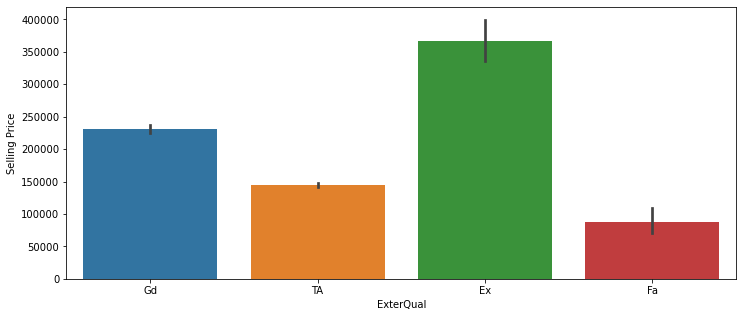

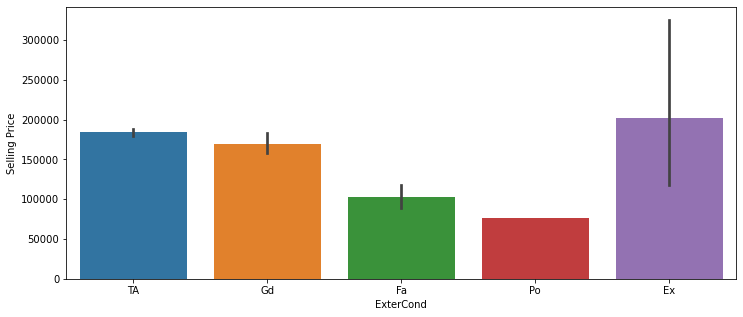

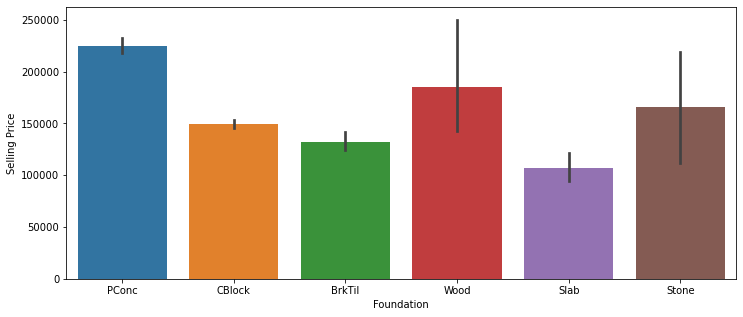

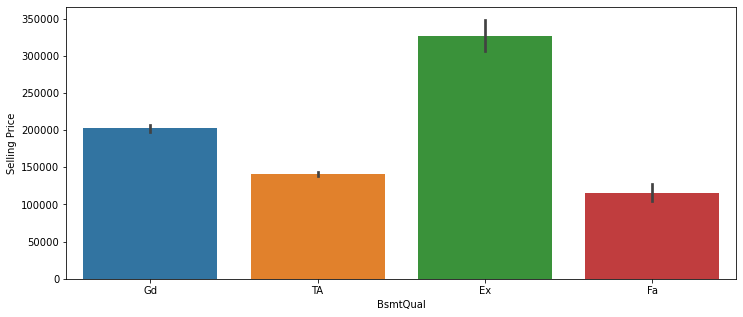

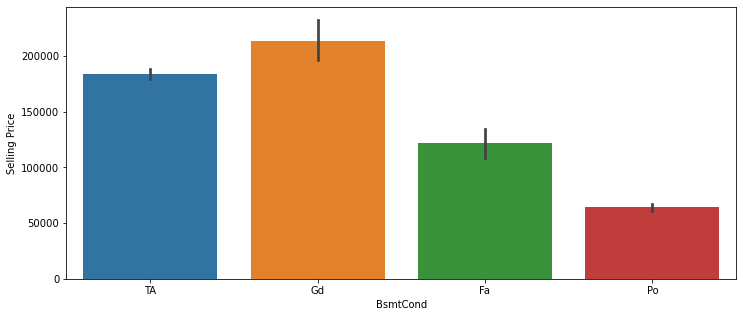

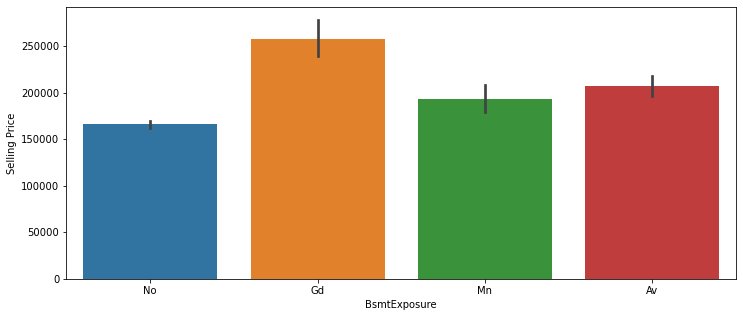

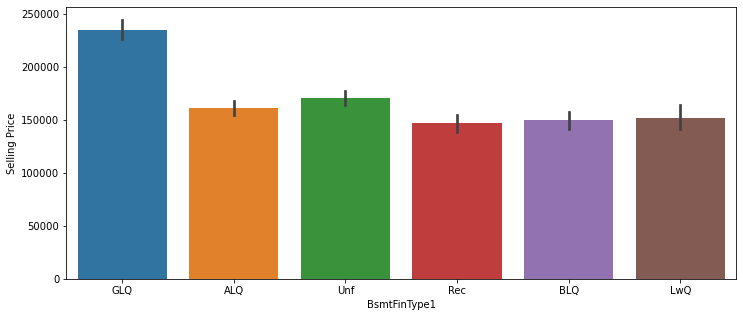

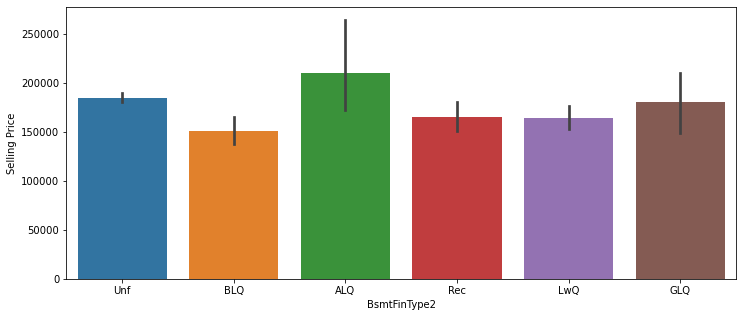

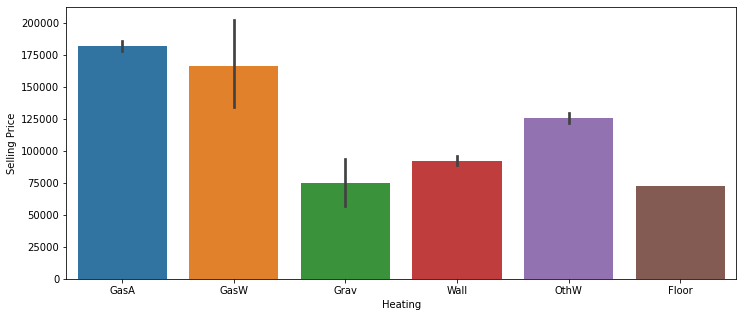

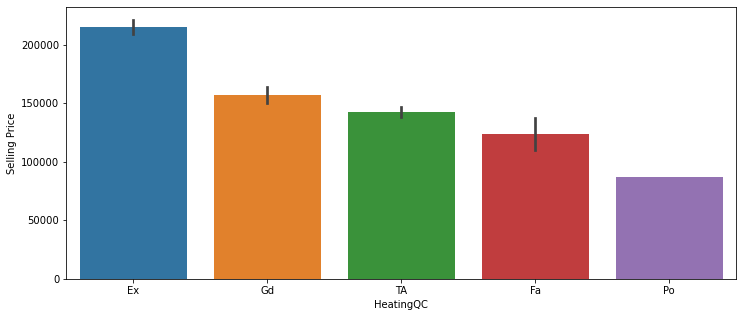

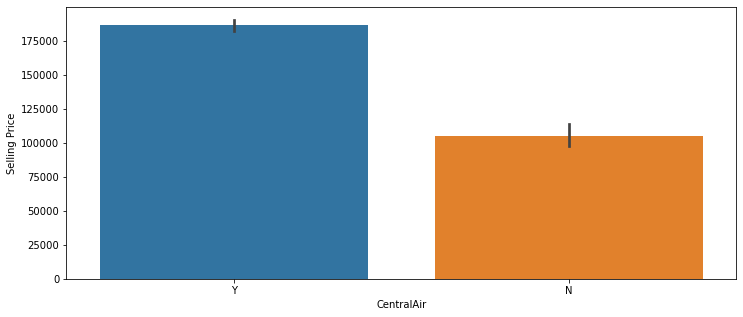

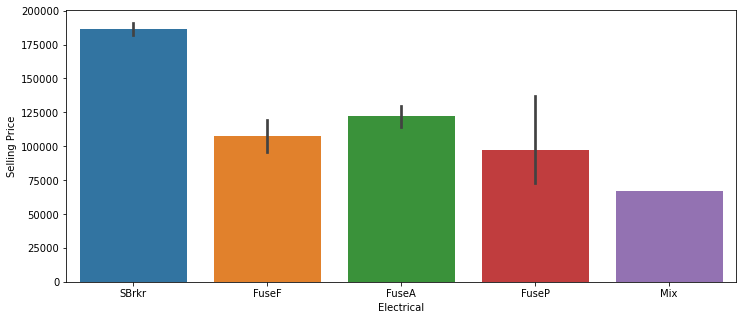

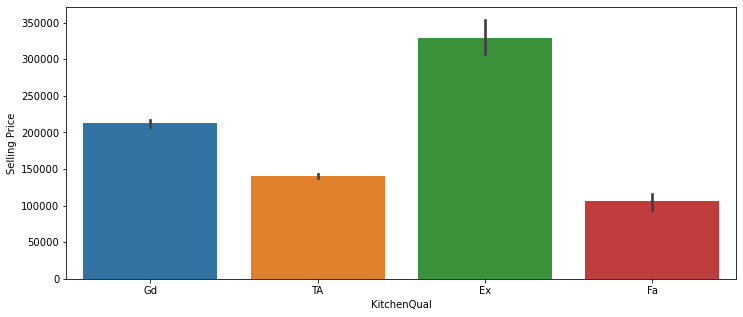

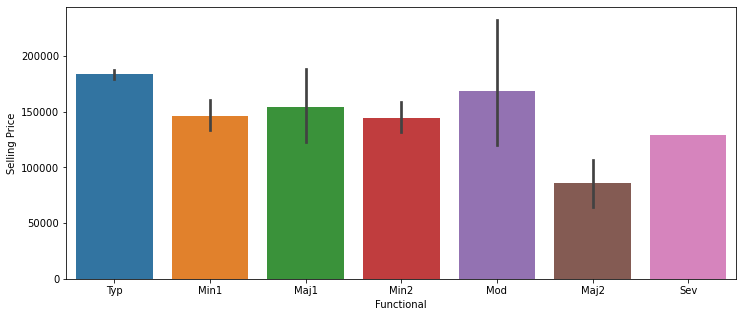

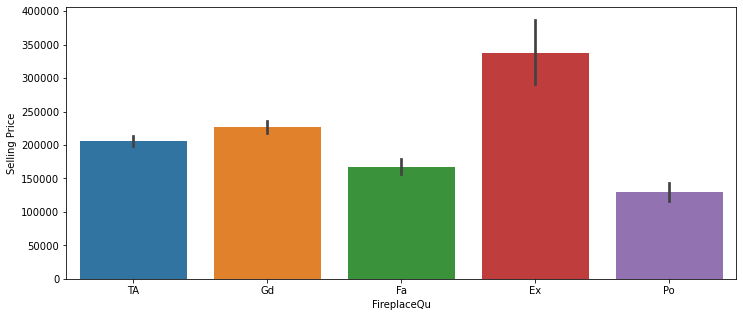

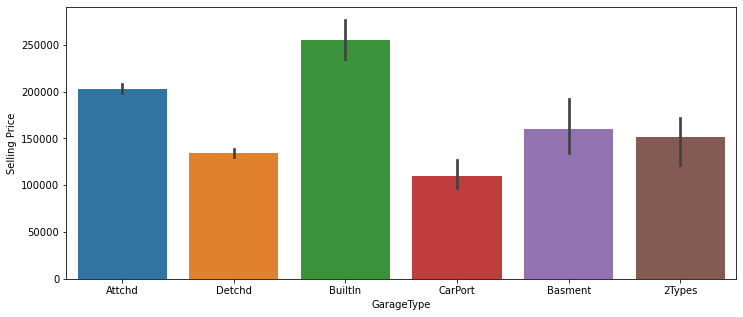

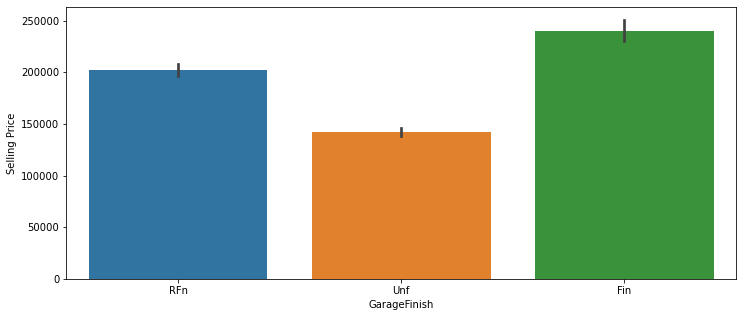

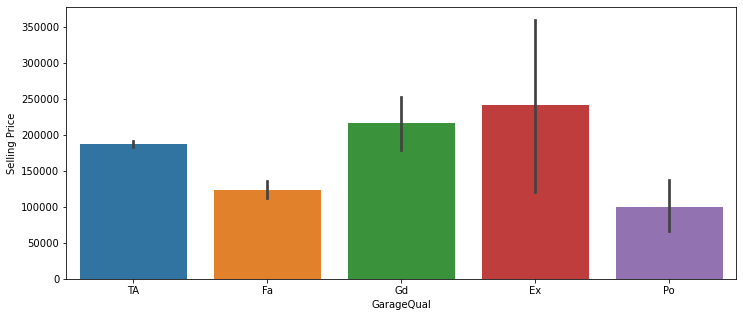

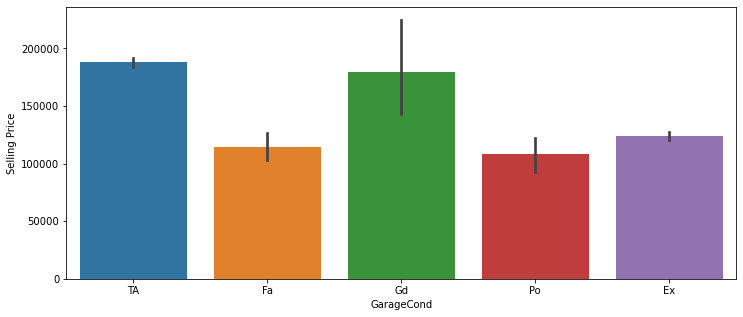

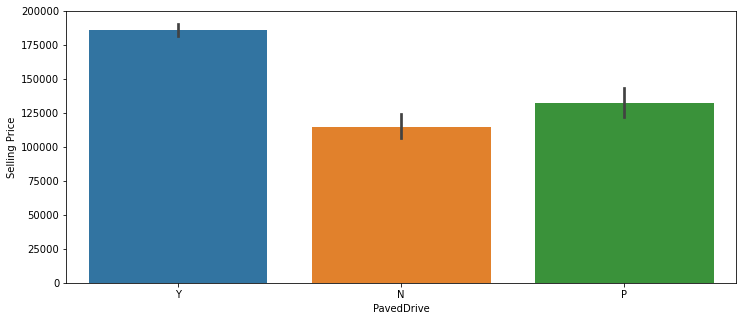

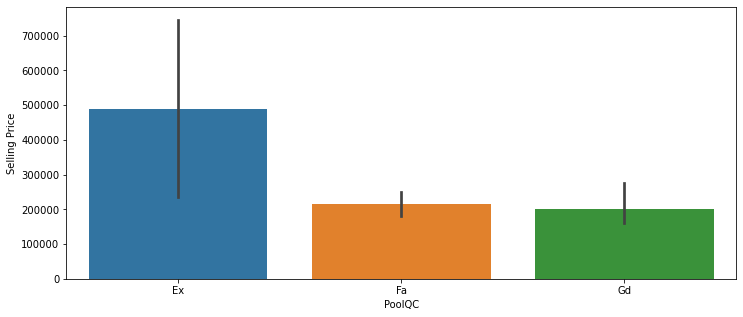

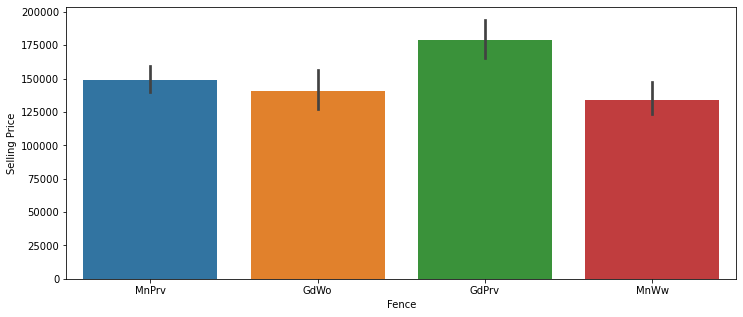

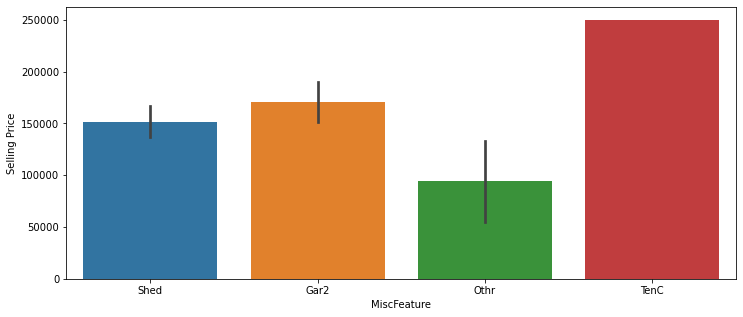

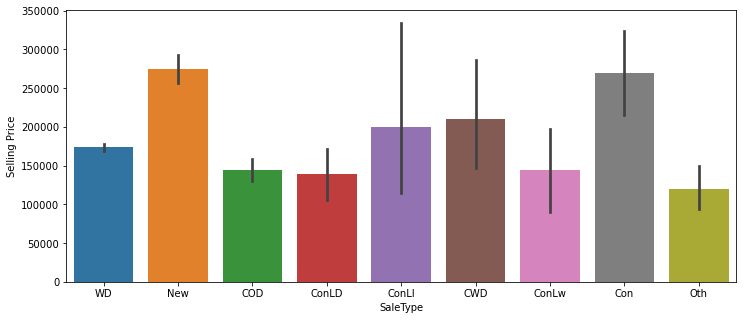

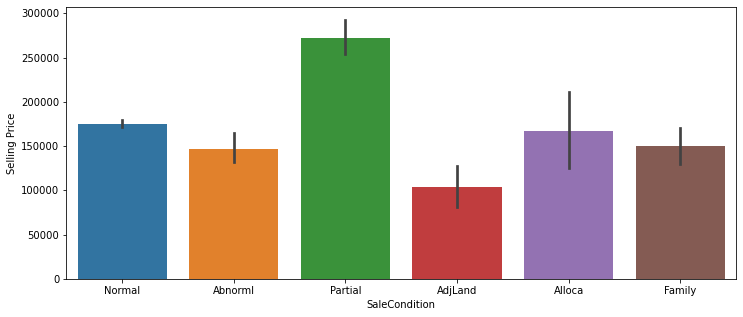

In [21]:
#lets check the relationship  between categorical features and the target
c_vars = [vr for vr in train.columns if train[vr].dtypes=='O']
for c in c_vars:
    plt.figure(figsize=(12,5))
    sns.barplot(x=train[c],y=target,data=train)
    plt.xlabel(c)
    plt.ylabel('Selling Price')
    plt.show()

In [22]:
#lets handle missing values for categorical variables
pd.set_option('display.max_rows', 100)
train[c_vars].isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinType2     0.026027
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000685
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
PavedDrive       0.000000
PoolQC      

In [23]:
#lets get mode for categorical variables
for vr in c_vars:
    print('')
    print(vr)
    print(train[vr].mode())


MSZoning
0    RL
dtype: object

Street
0    Pave
dtype: object

Alley
0    Grvl
dtype: object

LotShape
0    Reg
dtype: object

LandContour
0    Lvl
dtype: object

Utilities
0    AllPub
dtype: object

LotConfig
0    Inside
dtype: object

LandSlope
0    Gtl
dtype: object

Neighborhood
0    NAmes
dtype: object

Condition1
0    Norm
dtype: object

Condition2
0    Norm
dtype: object

BldgType
0    1Fam
dtype: object

HouseStyle
0    1Story
dtype: object

RoofStyle
0    Gable
dtype: object

RoofMatl
0    CompShg
dtype: object

Exterior1st
0    VinylSd
dtype: object

Exterior2nd
0    VinylSd
dtype: object

MasVnrType
0    None
dtype: object

ExterQual
0    TA
dtype: object

ExterCond
0    TA
dtype: object

Foundation
0    PConc
dtype: object

BsmtQual
0    TA
dtype: object

BsmtCond
0    TA
dtype: object

BsmtExposure
0    No
dtype: object

BsmtFinType1
0    Unf
dtype: object

BsmtFinType2
0    Unf
dtype: object

Heating
0    GasA
dtype: object

HeatingQC
0    Ex
dtype: object

CentralAir
0

In [24]:
#Filling the missing values in categorical variables
train.MasVnrType.fillna('None',inplace=True)
test.MasVnrType.fillna('None',inplace=True)
train.BsmtQual.fillna("No",inplace=True)
test.BsmtQual.fillna("No",inplace=True)
train.BsmtCond.fillna("No",inplace=True)
test.BsmtCond.fillna("No",inplace=True)
train.BsmtExposure.fillna("No",inplace=True)
test.BsmtExposure.fillna("No",inplace=True)
train.BsmtFinType1.fillna("Unf",inplace=True)
test.BsmtFinType1.fillna("Unf",inplace=True)
train.BsmtFinType2.fillna("Unf",inplace=True)
test.BsmtFinType2.fillna("Unf",inplace=True)
train.Electrical.fillna("None",inplace=True)
test.Electrical.fillna("None",inplace=True)
train.GarageType.fillna("None",inplace=True)
test.GarageType.fillna("None",inplace=True)
train.GarageFinish.fillna("Unf",inplace=True)
test.GarageFinish.fillna("Unf",inplace=True)
train.GarageQual.fillna("None",inplace=True)
test.GarageQual.fillna("None",inplace=True)
train.GarageCond.fillna("None",inplace=True)
test.GarageCond.fillna("None",inplace=True)
train.Alley.fillna("None",inplace=True)
test.Alley.fillna("None",inplace=True)
train.FireplaceQu.fillna("None",inplace=True)
test.FireplaceQu.fillna("None",inplace=True)
train.PoolQC.fillna("None",inplace=True)
test.PoolQC.fillna("None",inplace=True)
train.Fence.fillna("None",inplace=True)
test.Fence.fillna("None",inplace=True)
train.MiscFeature.fillna("None",inplace=True)
test.MiscFeature.fillna("None",inplace=True)

# handling rare labels

Those are labels present in the train set but not present in the test set

CHECK LABELS PRESENT IN TRAIN BUT NOT IN TEST:

In [25]:
c_vars = [vr for vr in train.columns if train[vr].dtypes=="O"]
for vr in c_vars:
    print(vr)
    unique_to_train_set = [
            x for x in train[vr].unique() if x not in test[vr].unique()
        ]

    print(unique_to_train_set)

MSZoning
[]
Street
[]
Alley
[]
LotShape
[]
LandContour
[]
Utilities
['NoSeWa']
LotConfig
[]
LandSlope
[]
Neighborhood
[]
Condition1
[]
Condition2
['RRNn', 'RRAn', 'RRAe']
BldgType
[]
HouseStyle
['2.5Fin']
RoofStyle
[]
RoofMatl
['Metal', 'Membran', 'Roll', 'ClyTile']
Exterior1st
['Stone', 'ImStucc']
Exterior2nd
['Other']
MasVnrType
[]
ExterQual
[]
ExterCond
[]
Foundation
[]
BsmtQual
[]
BsmtCond
[]
BsmtExposure
[]
BsmtFinType1
[]
BsmtFinType2
[]
Heating
['OthW', 'Floor']
HeatingQC
[]
CentralAir
[]
Electrical
['Mix', 'None']
KitchenQual
[]
Functional
[]
FireplaceQu
[]
GarageType
[]
GarageFinish
[]
GarageQual
['Ex']
GarageCond
[]
PavedDrive
[]
PoolQC
['Fa']
Fence
[]
MiscFeature
['TenC']
SaleType
[]
SaleCondition
[]


CHECK LABELS PRESENT IN TRAIN BUT NOT IN TEST:

In [26]:
c_vars = [vr for vr in train.columns if train[vr].dtypes=="O"]
for vr in c_vars:
    print(vr)
    unique_to_test_set = [
            x for x in test[vr].unique() if x not in train[vr].unique()
        ]

    print(unique_to_train_set)

MSZoning
[]
Street
[]
Alley
[]
LotShape
[]
LandContour
[]
Utilities
[]
LotConfig
[]
LandSlope
[]
Neighborhood
[]
Condition1
[]
Condition2
[]
BldgType
[]
HouseStyle
[]
RoofStyle
[]
RoofMatl
[]
Exterior1st
[]
Exterior2nd
[]
MasVnrType
[]
ExterQual
[]
ExterCond
[]
Foundation
[]
BsmtQual
[]
BsmtCond
[]
BsmtExposure
[]
BsmtFinType1
[]
BsmtFinType2
[]
Heating
[]
HeatingQC
[]
CentralAir
[]
Electrical
[]
KitchenQual
[]
Functional
[]
FireplaceQu
[]
GarageType
[]
GarageFinish
[]
GarageQual
[]
GarageCond
[]
PavedDrive
[]
PoolQC
[]
Fence
[]
MiscFeature
[]
SaleType
[]
SaleCondition
[]


In [27]:
def rare_cat(df, vr):

    total_houses = len(df)

    # first I calculate the % of houses for each category
    r_df = pd.Series(df[vr].value_counts() / total_houses)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    rare_dict = {
        r: ('rare' if r not in r_df[r_df >= 0.05].index else r)
        for r in r_df.index
    }

    # now I replace the rare categories
    rt = df[vr].map(rare_dict)

    return rt

In [28]:
for vr in c_vars:
    train[vr] = rare_cat(train,vr)

In [29]:
for vr in c_vars:
    test[vr] = rare_cat(test,vr)

In [30]:
c_vars = [vr for vr in train.columns if train[vr].dtypes=="O"]
for vr in c_vars:
    print(vr)
    unique_to_train_set = [
            x for x in train[vr].unique() if x not in test[vr].unique()
        ]

    print(unique_to_train_set)

MSZoning
[]
Street
[]
Alley
[]
LotShape
[]
LandContour
[]
Utilities
['rare']
LotConfig
[]
LandSlope
[]
Neighborhood
['NWAmes']
Condition1
[]
Condition2
[]
BldgType
[]
HouseStyle
[]
RoofStyle
[]
RoofMatl
[]
Exterior1st
[]
Exterior2nd
[]
MasVnrType
[]
ExterQual
[]
ExterCond
[]
Foundation
[]
BsmtQual
[]
BsmtCond
[]
BsmtExposure
[]
BsmtFinType1
[]
BsmtFinType2
[]
Heating
[]
HeatingQC
[]
CentralAir
[]
Electrical
[]
KitchenQual
[]
Functional
[]
FireplaceQu
[]
GarageType
[]
GarageFinish
[]
GarageQual
[]
GarageCond
[]
PavedDrive
[]
PoolQC
[]
Fence
[]
MiscFeature
[]
SaleType
[]
SaleCondition
[]


In [31]:
train.Neighborhood.replace('NWAmes','NAmes',inplace=True)

In [32]:
train.Neighborhood.replace('NAmes ','NAmes',inplace=True)

In [33]:
train.Utilities.replace('rare','AllPub',inplace=True)

# handling misssing values for numerical variables

In [34]:
#calculate median for LotFrontage
median=train['LotFrontage'].median()

In [35]:
#calculate median for LotFrontage
median_m=train['MasVnrArea'].median()

In [36]:
#calculate median for LotFrontage
median_G=train['GarageYrBlt'].median() 

In [37]:
#func for imputation
def impute_null(df, vr, med):

    return df[vr].fillna(med)


In [38]:
n_vars = [vr for vr in train.columns if train[vr].dtypes!="O" and vr!='Id']
for vr in n_vars:
    test[vr].fillna(test[vr].median(), inplace=True)

In [39]:
train['LotFrontage']=impute_null(train,'LotFrontage',median)
test['LotFrontage']=impute_null(train,'LotFrontage',median)

In [40]:
train['MasVnrArea']=impute_null(train,'MasVnrArea',median_m)

In [41]:
train['GarageYrBlt']=impute_null(train,'GarageYrBlt',median_G)

In [42]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,rare,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,rare,...,0,0,None,None,None,0,12,2008,WD,Normal


WORKING ON YR FEATURES

In [43]:
def diff_in_years(df, vr):
    df[vr] = df['YrSold'] - df[vr]
    return df

In [44]:
yr_features =  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
for vr in yr_features:
     train = diff_in_years(train, vr)
  

In [45]:
print(train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']])


      YearBuilt  YearRemodAdd  GarageYrBlt
0             5             5          5.0
1            31            31         31.0
2             7             6          7.0
3            91            36          8.0
4             8             8          8.0
...         ...           ...          ...
1455          8             7          8.0
1456         32            22         32.0
1457         69             4         69.0
1458         60            14         60.0
1459         43            43         43.0

[1460 rows x 3 columns]


# Check for distribution of numerical variables

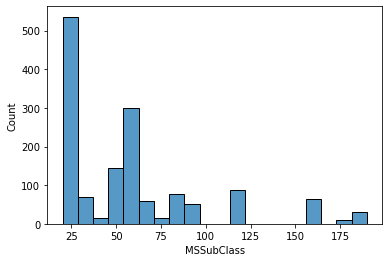

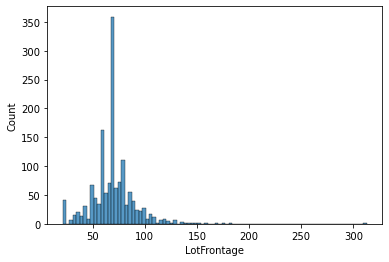

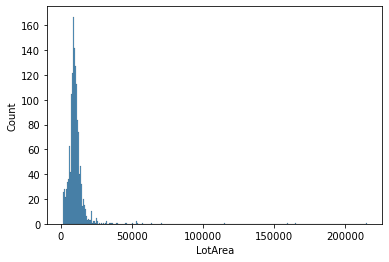

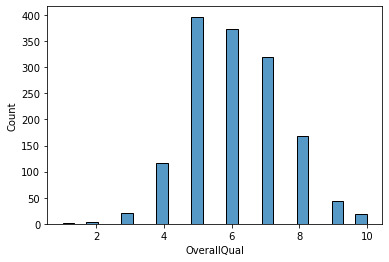

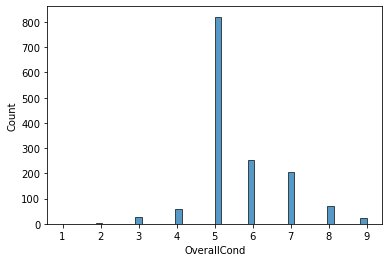

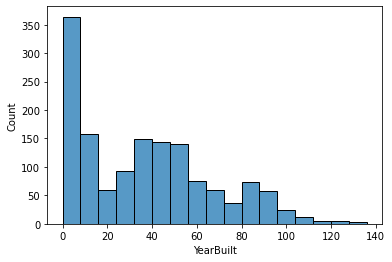

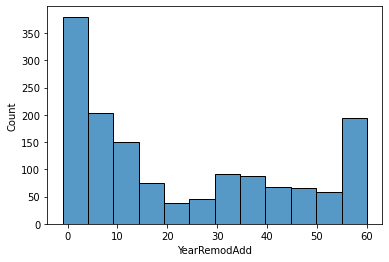

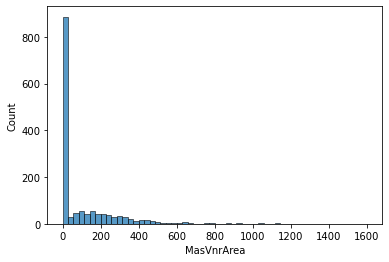

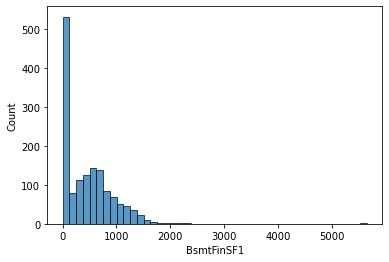

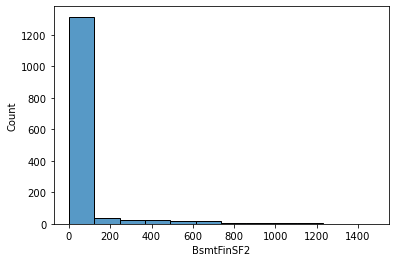

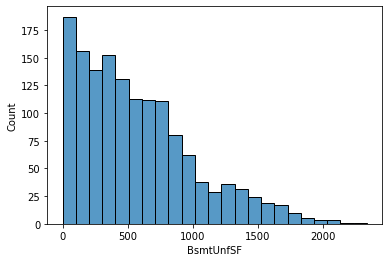

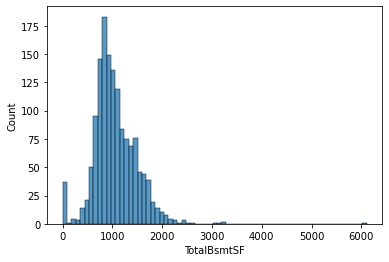

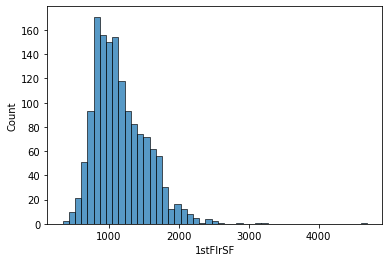

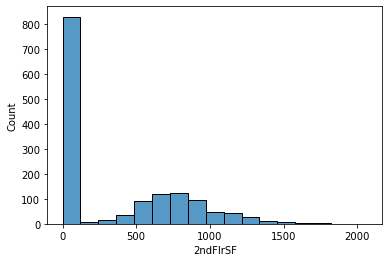

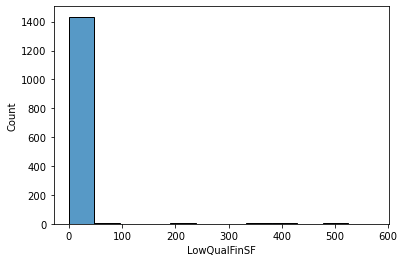

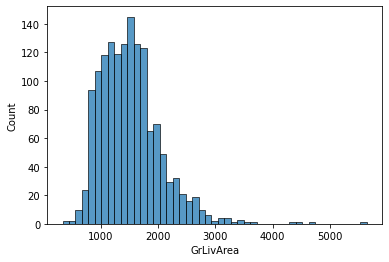

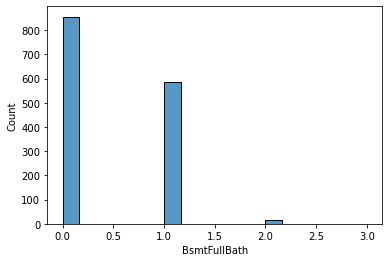

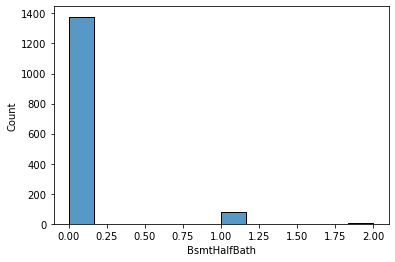

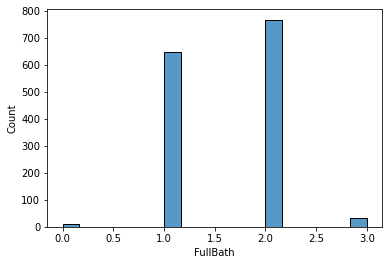

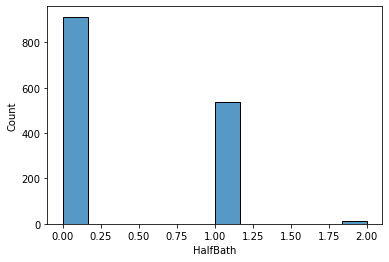

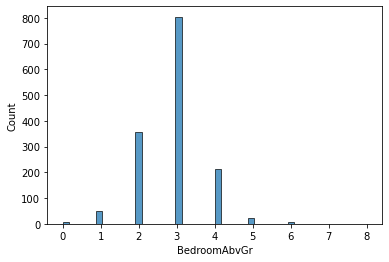

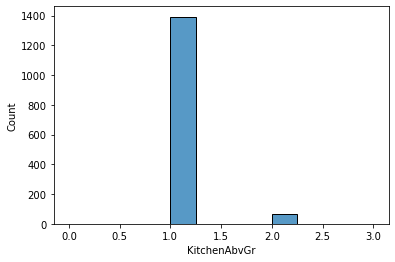

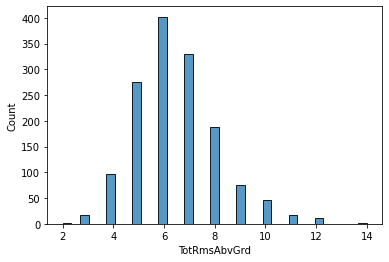

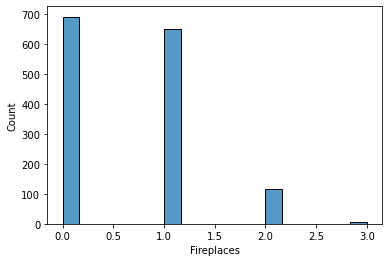

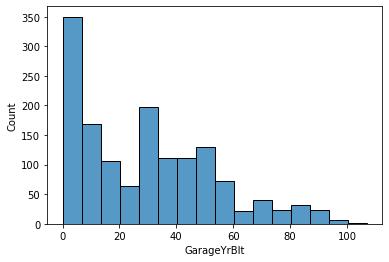

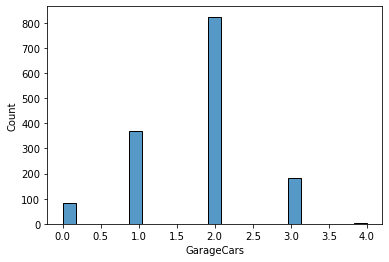

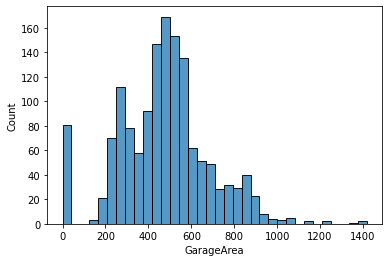

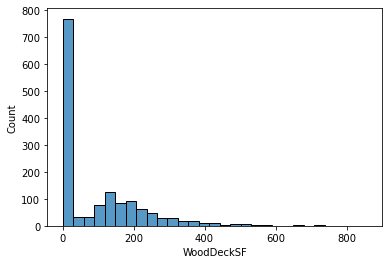

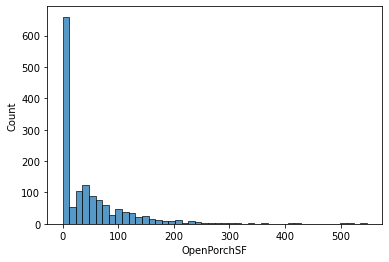

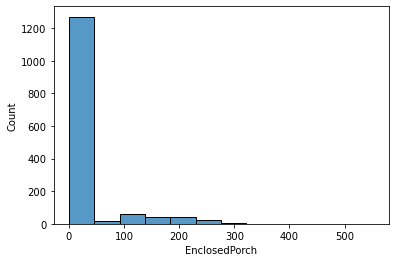

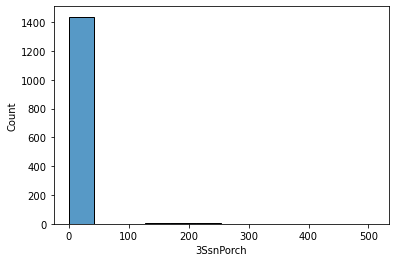

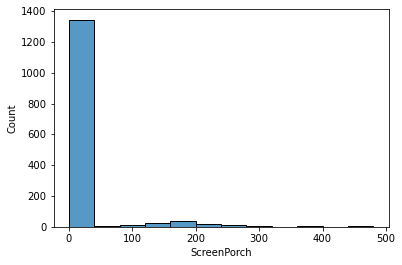

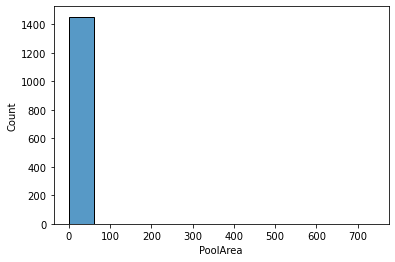

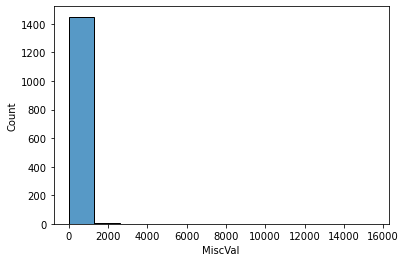

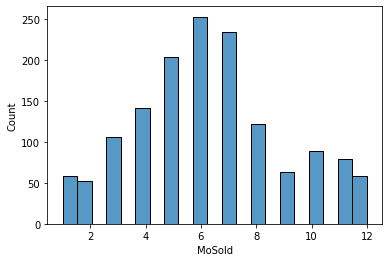

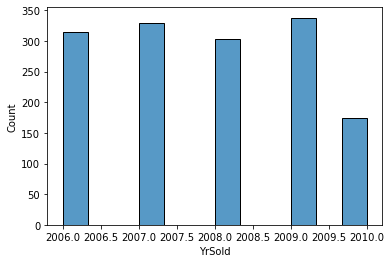

In [46]:
n_vars = [vr for vr in train.columns if train[vr].dtypes!="O" and vr!='Id']
for vr in n_vars:
    sns.histplot(train[vr])
    plt.show()

# CATEGORICAL ENCODING

In [47]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [48]:
pd.set_option('display.max_rows', 1000)
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_rare,MiscFeature_None,MiscFeature_rare,SaleType_New,SaleType_WD,SaleType_rare,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_rare
0,60,65.0,8450,7,5,5,5,196.0,706,0,...,0,1,0,0,1,0,0,1,0,0
1,20,80.0,9600,6,8,31,31,0.0,978,0,...,0,1,0,0,1,0,0,1,0,0
2,60,68.0,11250,7,5,7,6,162.0,486,0,...,0,1,0,0,1,0,0,1,0,0
3,70,60.0,9550,7,5,91,36,0.0,216,0,...,0,1,0,0,1,0,1,0,0,0
4,60,84.0,14260,8,5,8,8,350.0,655,0,...,0,1,0,0,1,0,0,1,0,0


In [49]:
unique_to_train_set = [
x for x in test.columns if x not in train.columns
]

print(unique_to_train_set)

['Id', 'MSZoning_FV', 'GarageQual_Fa']


In [50]:
stuborn_cat=[['Id','MSZoning_FV','GarageQual_Fa']]
for vr in stuborn_cat:
    test=test.drop(test[vr],axis=1)

In [51]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_rare,MiscFeature_None,MiscFeature_rare,SaleType_New,SaleType_WD,SaleType_rare,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_rare
0,20,65.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,1,0,0,1,0,0,1,0,0
1,20,80.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,0,1,0,0,1,0,0
2,60,68.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,1,0,0,1,0,0,1,0,0
3,60,60.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,1,0,0,1,0,0,1,0,0
4,120,84.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,1,0,0,1,0,0,1,0,0


# OUTLIER HANDLING

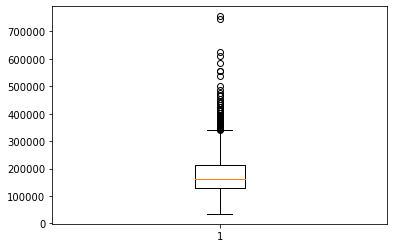

In [52]:
#checking for outliers in the target
plt.boxplot(target)
plt.show()

In [53]:
def outlier_boundary(vr):
    oulier_lower=vr.quantile(0.05)
    oulier_upper=vr.quantile(0.95)
    return oulier_lower,oulier_upper

In [54]:
#checking the top and bottom baundries
last_p,top_p=outlier_boundary(target)
last_p,top_p

(88000.0, 326099.99999999994)

In [55]:
#capping outlier in the target
target=np.where(target>top_p,top_p,
                    np.where(target<last_p,last_p,target))



# Feature Scaling

In [56]:
#Feature Scaling
scaler=StandardScaler()
scaler.fit(train)

StandardScaler()

In [57]:
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)




# FEATURE SELECTION USING PLS

In [58]:
MAE = []
RMSE = []
for i in range(20,0,-1): 
    pls_reg = PLSRegression(n_components=i)
    y_cv = cross_val_predict(pls_reg, train_scaled, target, cv=5)
    pls_reg.fit(train_scaled,target)
    pred_pls = pls_reg.predict(train_scaled)
 
    MA = metrics.mean_absolute_error(target, y_cv)
    MAE.append(MA)
    RM = np.sqrt(metrics.mean_squared_error(target, y_cv))
    RMSE.append(RM)

Text(0.5, 0, 'number of components')

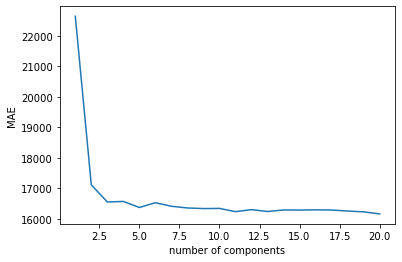

In [59]:
plt.plot(range(20,0,-1),MAE)
plt.ylabel('MAE')
plt.xlabel('number of components')

Text(0.5, 0, 'number of components')

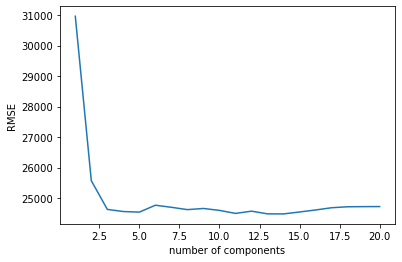

In [60]:
plt.plot(range(20,0,-1),RMSE)
plt.ylabel('RMSE')
plt.xlabel('number of components')

# From the plots it can be seen that the least error is recoded around 3 to 5 components

In [61]:
pls2 = PLSRegression(n_components=3)
pls2.fit(train_scaled,target)

PLSRegression(n_components=3)

In [62]:
train_pls=pls2.transform(train_scaled)
test_pls=pls2.transform(test_scaled)

In [63]:
train_pls

array([[ 3.55780241, -2.40466023,  0.9610559 ],
       [ 0.05135886, -0.25298639,  0.73418129],
       [ 4.65969222, -1.59465944,  0.71958582],
       ...,
       [ 1.02957451,  4.42886627,  2.24771345],
       [-2.96474145,  0.40283888,  2.77119375],
       [-1.45787421, -0.85950458,  0.98693848]])

In [64]:
test_pls

array([[-38.59782338,  18.96104657,  -3.02640271],
       [-36.1640051 ,  21.93755999,  -2.7180224 ],
       [-34.29772371,  19.98587749,  -4.24880145],
       ...,
       [-35.92756085,  21.02363439,  -2.72539715],
       [-39.91859411,  20.92042597,  -1.62252667],
       [-32.72376524,  22.73207438,  -2.91630771]])

# MODEL BUILDING

RANDOM FOREST

In [65]:
rf_reg=RandomForestRegressor()

In [66]:
rf_reg.fit(train_pls,target)

RandomForestRegressor()

In [67]:
predictions=rf_reg.predict(train_pls)

In [68]:
print('MAE:', metrics.mean_absolute_error(target, predictions))
print('MSE:', metrics.mean_squared_error(target, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(target, predictions)))

MAE: 5434.306794520546
MSE: 59581275.96110244
RMSE: 7718.890850446224


XGBOOST CLASSIFIER

In [69]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(train_pls, target)

GradientBoostingRegressor(random_state=0)

In [70]:
pred=reg.predict(train_pls)

In [71]:
print('MAE:', metrics.mean_absolute_error(target, pred))
print('MSE:', metrics.mean_squared_error(target, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(target, pred)))

MAE: 11110.250724768184
MSE: 224507814.3563739
RMSE: 14983.584829952208


RANDOM FOREST REGRESSOR PERFORMS BETTER THAN XGBOOST MODEL,SO I WILL USE IT TO TRAIN MY UNSEEN DATA

In [72]:
#predicting my unseen data
predictions=rf_reg.predict(test_pls)

In [73]:
#convert to csv
submission = {'Id': test_id, 'SalePrice': predictions}
submission = pd.DataFrame(data=submission)
submission.to_csv('submission.csv', index=False)